<a href="https://colab.research.google.com/github/MK316/Workingpapers/blob/main/LD_paper_analysis01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data

## [1] Path, data selection, directory, etc.

In [80]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")

import base64
import requests

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [82]:
!pwd

/content/workingpapers/ksat_LC


In [81]:
# Clone data
!git clone https://github.com/MK316/workingpapers.git

Cloning into 'workingpapers'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (44/44), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 137 (delta 7), reused 0 (delta 0), pack-reused 93
Receiving objects: 100% (137/137), 43.48 MiB | 17.20 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [83]:
import os.path
os.chdir('/content/workingpapers/ksat_textfiles/')
!pwd

/content/workingpapers/ksat_textfiles


In [94]:
# Updata github files
!git pull

Already up to date.


In [96]:
# Change directory
%cd /content/workingpapers/ksat_LC/

/content/workingpapers/ksat_LC


In [97]:
# File list: 26 files in ksat_LC folder
import os
filenames = os.listdir('.')
len(filenames)

27

In [98]:
# Select .12.txt files using {re}
import re
newlist = [w for w in filenames if re.search('.12.', w)]
# newlist = newlist.remove('2014.12.txt')
print(len(newlist), 'files')

8 files


In [ ]:
n = range(0,len(newlist));

for i in n:
  samplefile = newlist[i]
  with open(samplefile, "r") as f1:
    FileContent = f1.read()
    print(FileContent)
    name = str(i+1)
    filename = "text%s" % name
    locals()[filename] = FileContent
# Variables: text1~text8

In [110]:
fileslist = [text1, text2, text3, text4, text5, text6, text7, text8]

for i in range(0, len(fileslist)):

   print('='*40, '\n','Total length', 'text%d: ' %(i+1),len(fileslist[i]), ' strings')


 Total length text1:  30497  strings
 Total length text2:  30362  strings
 Total length text3:  31000  strings
 Total length text4:  31273  strings
 Total length text5:  28173  strings
 Total length text6:  31744  strings
 Total length text7:  31258  strings
 Total length text8:  29189  strings


In [128]:
# word_tokenize: separating punctuation as individual word items

for i in range(0, len(fileslist)):
  sample = fileslist[i]
  words = word_tokenize(sample)
  name = str(i+1)
  wordsname = "word%s" % name
  locals()[wordsname] = words 
  print('=='*25)
  spltxt=fileslist[i].split()
  print('* Splitted words by space: ', len(spltxt), "(", 'text%i' %(i+1), ")")
  # print('* Total words including punctuation: ', len(wordsname)); print('=='*25)


* Splitted words by space:  5254 ( text1 )
* Splitted words by space:  5264 ( text2 )
* Splitted words by space:  5282 ( text3 )
* Splitted words by space:  5328 ( text4 )
* Splitted words by space:  4891 ( text5 )
* Splitted words by space:  5357 ( text6 )
* Splitted words by space:  5333 ( text7 )
* Splitted words by space:  5070 ( text8 )


Variable change: text1 => rawdata1

In [114]:
rawdata1 = text1
rawdata2 = text2
rawdata3 = text3
rawdata4 = text4
rawdata5 = text5
rawdata6 = text6
rawdata7 = text7
rawdata8 = text8

print("Before processing: ",len(rawdata1),"(string)")
print("Before processing: ",len(rawdata2),"(string)")
print("Before processing: ",len(rawdata3),"(string)")
print("Before processing: ",len(rawdata4),"(string)")
print("Before processing: ",len(rawdata5),"(string)")
print("Before processing: ",len(rawdata6),"(string)")
print("Before processing: ",len(rawdata7),"(string)")
print("Before processing: ",len(rawdata8),"(string)")

Before processing:  30497 (string)
Before processing:  30362 (string)
Before processing:  31000 (string)
Before processing:  31273 (string)
Before processing:  28173 (string)
Before processing:  31744 (string)
Before processing:  31258 (string)
Before processing:  29189 (string)


Remove Koreans from texts

locals()[stringname] = content
Convert 'stringname ' to variable

In [126]:
rawdata = [rawdata1, rawdata2, rawdata3, rawdata4, rawdata5, rawdata6, rawdata7, rawdata8]

Remove Koreans, numbers

In [147]:
for i in range(0, len(rawdata)):
  nokorean = 'noKorean' + str(i+1)
  before = rawdata[i]
  after = locals()[nokorean] = re.sub('[^A-Za-z.]+', ' ',rawdata[i])
  data = 'rawdata' + str(i+1)
  locals()[data] = after
  print("(", 'text%i' %(i+1), ")", "Before processing: ",len(before), "=>", "(After)", len(after), "(string)")

( text1 ) Before processing:  30497 => (After) 26909 (string)
( text2 ) Before processing:  30362 => (After) 26636 (string)
( text3 ) Before processing:  31000 => (After) 27262 (string)
( text4 ) Before processing:  31273 => (After) 27197 (string)
( text5 ) Before processing:  28173 => (After) 24861 (string)
( text6 ) Before processing:  31744 => (After) 27899 (string)
( text7 ) Before processing:  31258 => (After) 27033 (string)
( text8 ) Before processing:  29189 => (After) 25599 (string)


In [156]:
dataset = [rawdata1, rawdata2, rawdata3, rawdata4, rawdata5, rawdata6, rawdata7, rawdata8]

In [157]:
for i in range(0, len(dataset)):
  sample = rawdata[i]
  words = word_tokenize(sample)
  name = 'data' + str(i+1)
  words_new = [w for w in words if len(w)>1]
  locals()[name] = ' '.join(words_new)

In [164]:
import string

def clean_text(text):
    # remove numbers
    text_nonum = re.sub(r'\d+', '', text)
    # remove punctuations and convert characters to lower case
    text_nopunct = "".join([char.lower() for char in text_nonum if char not in string.punctuation]) 
    # substitute multiple whitespace with single whitespace
    # Also, removes leading and trailing whitespaces
    text_no_doublespace = re.sub('\s+', ' ', text_nopunct).strip()
    return text_no_doublespace

In [169]:
clean_data1 = clean_text(data1)
clean_data2 = clean_text(data2)
clean_data3 = clean_text(data3)
clean_data4 = clean_text(data4)
clean_data5 = clean_text(data5)
clean_data6 = clean_text(data6)
clean_data7 = clean_text(data7)
clean_data8 = clean_text(data8)

In [195]:
cleanset = [clean_data1, clean_data2, clean_data3, clean_data4, clean_data5, clean_data6, clean_data7, clean_data8]
for i in range(0, len(cleanset)):
  d = cleanset[i]
  set = word_tokenize(d)
  print('clean_data%d:'%(i+1), 'Number of words = ', len(set))

clean_data1: Number of words =  4319
clean_data2: Number of words =  4256
clean_data3: Number of words =  4271
clean_data4: Number of words =  4285
clean_data5: Number of words =  4028
clean_data6: Number of words =  4384
clean_data7: Number of words =  4324
clean_data8: Number of words =  4130


# Lexical Diversity

In [177]:
pip install lexical-diversity
from lexical_diversity import lex_div as ld

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 117 kB 7.9 MB/s 


In [178]:
# cleanset = [clean_data1, clean_data2, clean_data3, clean_data4, clean_data5, clean_data6, clean_data7, clean_data8]
# All in lowercase

## Remove stopwords

In [187]:
from nltk.corpus import stopwords  
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [189]:
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append("'re"); stopwords.append("n't"); stopwords.append("'ve")
print('N of stopwords: ', len(stopwords))
print(stopwords)

N of stopwords:  182
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 's

In [197]:
for i in range(0, len(cleanset)):
  sample = cleanset[i]
  words = word_tokenize(sample)
  name = 'tok_data' + str(i+1)
  locals()[name] = words

In [199]:
#@title Default title text
# Removing stopwords: 'the' 'a' 'to' 'from' etc.

# words = [w for w in lowerword if not w in stopwords.words('english')]
words1 = [w for w in tok_data1 if (not w in stopwords) and (len(w) > 1)]
words2 = [w for w in tok_data2 if (not w in stopwords) and (len(w) > 1)]
words3 = [w for w in tok_data3 if (not w in stopwords) and (len(w) > 1)]
words4 = [w for w in tok_data4 if (not w in stopwords) and (len(w) > 1)]
words5 = [w for w in tok_data5 if (not w in stopwords) and (len(w) > 1)]
words6 = [w for w in tok_data6 if (not w in stopwords) and (len(w) > 1)]
words7 = [w for w in tok_data7 if (not w in stopwords) and (len(w) > 1)]
words8 = [w for w in tok_data8 if (not w in stopwords) and (len(w) > 1)]

#words1 = [w for w in words1 if len(w) > 1]
reduced1 = len(tok_data1) - len(words1)
reduced2 = len(tok_data2) - len(words2)
reduced3 = len(tok_data3) - len(words3)
reduced4 = len(tok_data4) - len(words4)
reduced5 = len(tok_data5) - len(words5)
reduced6 = len(tok_data6) - len(words6)
reduced7 = len(tok_data7) - len(words7)
reduced8 = len(tok_data8) - len(words8)


print('Summary: before and after stopwords process')
print('='*30)
print('Before stopwords:',len(tok_data1), ',',len(tok_data2),',', len(tok_data3))
print('After stopwords: ',len(words1),'(-%d),'%reduced1, len(words2), '(-%d),'%reduced2, len(words3), '(-%d)'%reduced3); 
print('='*30)
print(words1[:10])

Summary: before and after stopwords process
Before stopwords: 4319 , 4256 , 4271
After stopwords:  2443 (-1876), 2361 (-1895), 2446 (-1825)
['breaden', 'smiling', 'breaden', 'cute', 'three', 'year', 'old', 'boy', 'walking', 'along']


In [200]:
import pandas as pd

In [212]:
# initialize list elements
tok_data = [tok_data1, tok_data2, tok_data3, tok_data4, tok_data5, tok_data6, tok_data7, tok_data8]
nostop_data = [words1, words2, words3, words4, words5, words6, words7, words8]

len_tok_data = [len(tok_data1), len(tok_data2), len(tok_data3), len(tok_data4), len(tok_data5), len(tok_data6), len(tok_data7), len(tok_data8)]
len_nostop_data = [len(words1), len(words2), len(words3), len(words4), len(words5), len(words6), len(words7), len(words8)]

In [213]:
data = {'Before': len_tok_data, 'After': len_nostop_data }
df = pd.DataFrame(data)

print(df)
# for i in range(0, len(tok_data)):
#   b = len(tok_data[i])
#   a = len(nostop_data[i])
#   WS.append(b,a)

   Before  After
0    4319   2443
1    4256   2361
2    4271   2446
3    4285   2492
4    4028   2268
5    4384   2505
6    4324   2432
7    4130   2313


Wordcloud

In [214]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [215]:
wctext1 = ' '.join(words1)
wctext2 = ' '.join(words2)
wctext3 = ' '.join(words3)
print(len(wctext1))
print(len(wctext2))
print(len(wctext3))

18660
18338
19376


Text(0.5, 1.0, 'Wordcloud of data 2014. 6')

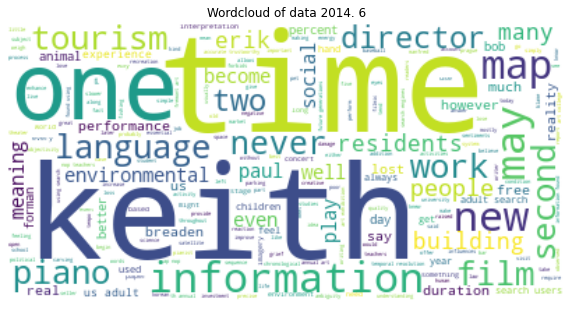

In [216]:
wordcloud1 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words1))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud1, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 6")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 9')

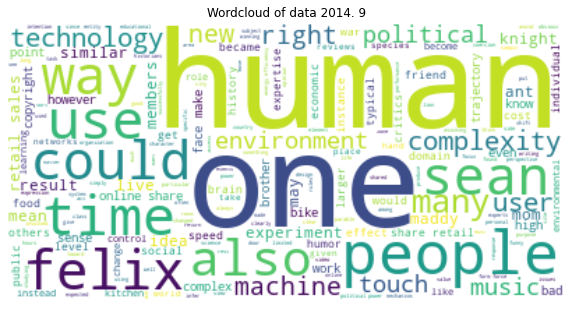

In [217]:
wordcloud2 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words2))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud2, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 9")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

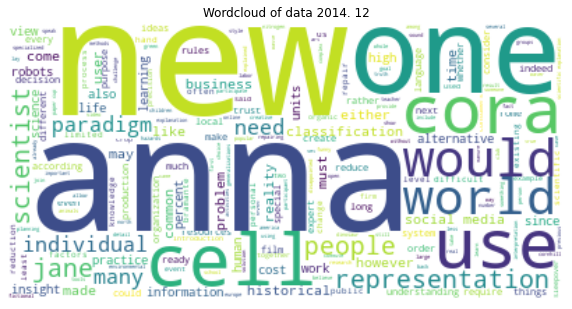

In [218]:
wordcloud3 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words3))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud3, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

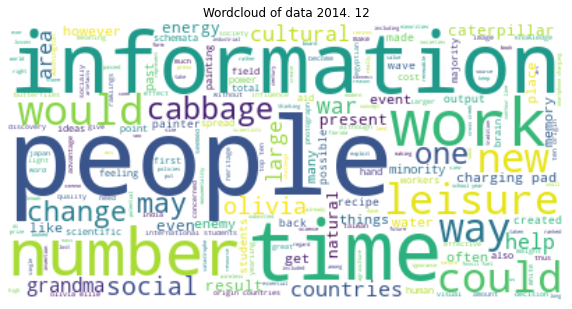

In [219]:
wordcloud4 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words4))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud4, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

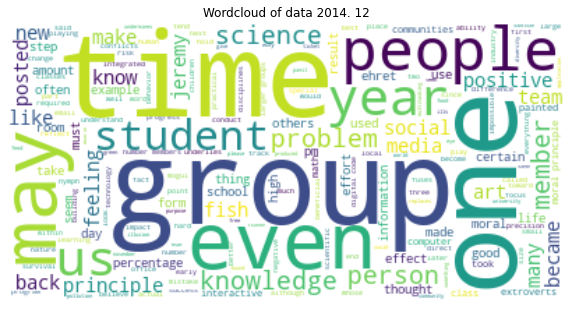

In [220]:
wordcloud5 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words5))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud5, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

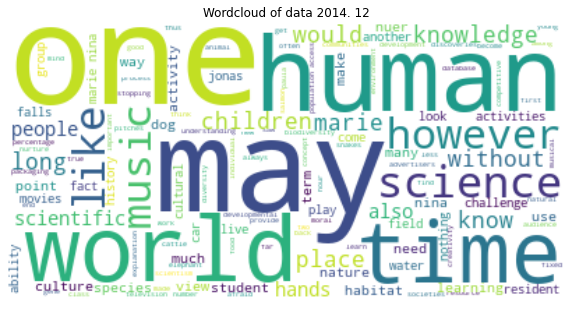

In [221]:
wordcloud6 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words6))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud6, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

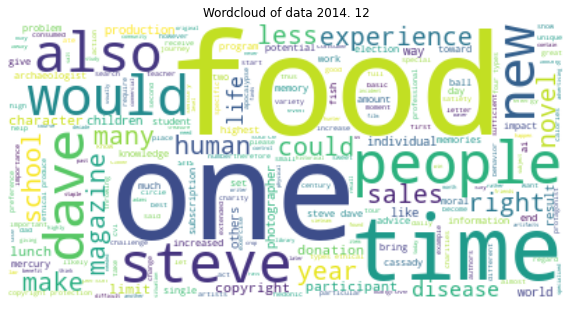

In [222]:
wordcloud7 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words7))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud7, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

Text(0.5, 1.0, 'Wordcloud of data 2014. 12')

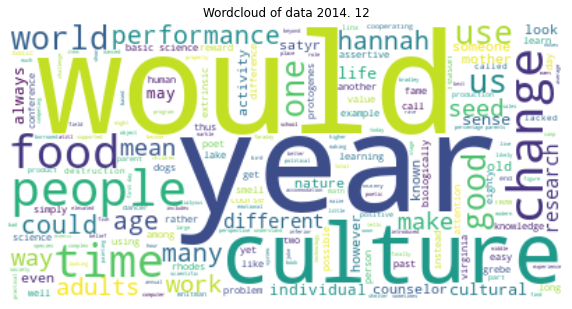

In [223]:
wordcloud8 = WordCloud(stopwords=stopwords,relative_scaling = 0.2, random_state=3,
                    max_words=2000, background_color='white').generate(' '.join(words8))
plt.figure(figsize=(10,10))
plt.imshow(wordcloud8, interpolation="bilinear")
plt.axis("off")
plt.title("Wordcloud of data 2014. 12")
#wordcloud.to_file('Wordcloud2014.png')

# Word Frequency

In [ ]:
!git pull

In [ ]:
fd = nltk.FreqDist(words1).most_common(n=None)
fd = nltk.FreqDist(words1).most_common(20)
fd

In [ ]:
%cd /content/workingpapers/results/
df = pd.DataFrame(fd,columns = ['Word','Freq']) 
print(df)
df.to_csv('HF_Data1.csv', index=False)

[1] Text: after removing stopwords

In [234]:
wctext1 = ' '.join(words1)
wctext2 = ' '.join(words2)
wctext3 = ' '.join(words3)
wctext4 = ' '.join(words4)
wctext5 = ' '.join(words5)
wctext6 = ' '.join(words6)
wctext7 = ' '.join(words7)
wctext8 = ' '.join(words8)


[2] Alternative: Before removing stopwords

In [246]:
wctext1 = ' '.join(tok_data1)
wctext2 = ' '.join(tok_data2)
wctext3 = ' '.join(tok_data3)
wctext4 = ' '.join(tok_data4)
wctext5 = ' '.join(tok_data5)
wctext6 = ' '.join(tok_data6)
wctext7 = ' '.join(tok_data7)
wctext8 = ' '.join(tok_data8)

In [247]:
text1 = wctext1
text2 = wctext2
text3 = wctext3
text4 = wctext4
text5 = wctext5
text6 = wctext6
text7 = wctext7
text8 = wctext8


In [248]:
flt1 = ld.flemmatize(text1)
flt2 = ld.flemmatize(text2)
flt3 = ld.flemmatize(text3)
flt4 = ld.flemmatize(text4)
flt5 = ld.flemmatize(text5)
flt6 = ld.flemmatize(text6)
flt7 = ld.flemmatize(text7)
flt8 = ld.flemmatize(text8)


In [249]:
ttr1 = ld.ttr(flt1)
ttr2 = ld.ttr(flt2)
ttr3 = ld.ttr(flt3)
ttr4 = ld.ttr(flt4)
ttr5 = ld.ttr(flt5)
ttr6 = ld.ttr(flt6)
ttr7 = ld.ttr(flt7)
ttr8 = ld.ttr(flt8)

print(ttr1, ttr2, ttr3, ttr4, ttr5, ttr6, ttr7, ttr8)

0.3070155128501968 0.3094454887218045 0.31233903067197377 0.3101516919486581 0.30784508440913605 0.3102189781021898 0.3064292321924144 0.32300242130750606


In [250]:
fltset = [flt1, flt2, flt3, flt4, flt5, flt6, flt7, flt8]

for i in range(0, len(fltset)):
  flt = fltset[i]
  ttr = ld.ttr(flt)
  rttr = ld.root_ttr(flt)
  logttr = ld.log_ttr(flt)
  msttr = ld.maas_ttr(flt)
  fdttr = ld.msttr(flt)
  mattr = ld.mattr(flt)
  hdd = ld.hdd(flt)
  mtld = ld.mtld(flt)
  bilog = ld.mtld_ma_wrap(flt)
  ma = ld.mtld_ma_bid(flt)

  filename = 'Text' + str(i+1)
  locals()[filename] = [ttr, rttr, logttr, msttr, fdttr, mattr, hdd, mtld, bilog, ma]

In [ ]:
data = {'Text1': Text1, 'Text2': Text2, 'Text3': Text3, 'Text4': Text4, 'Text5': Text5, 'Text6': Text6, 'Text7': Text7, 'Text8': Text8}
df = pd.DataFrame(data, index = ['TTR','RootTTR','LogTTR','MassTTR','MSTTR', 'MATTR','HDD','MTLD','BilogTTR','MofLTD'])
df

In [ ]:
tok_data1